In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r'https://raw.githubusercontent.com/mahendrathapa/digit-recognizer/master/data/train.csv')

In [40]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
df.shape

(42000, 785)

In [8]:
df.sample(4)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
27858      5       0       0       0       0       0       0       0       0   
17497      7       0       0       0       0       0       0       0       0   
5101       8       0       0       0       0       0       0       0       0   
614        9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
27858       0  ...         0         0         0         0         0   
17497       0  ...         0         0         0         0         0   
5101        0  ...         0         0         0         0         0   
614         0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
27858         0         0         0         0         0  
17497         0         0         0         0         0  
5101          0         0         0         0         0  
614           0         0         0         0         0  

[4 rows x 785 columns]

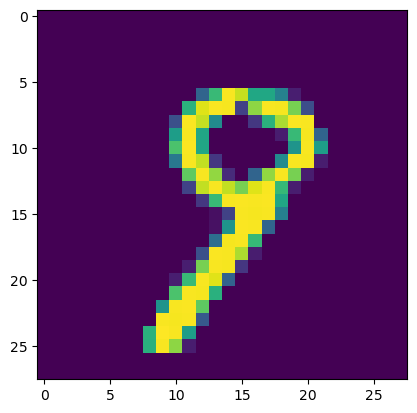

In [20]:
 plt.imshow(df.iloc[614,1:].values.reshape(28,28))

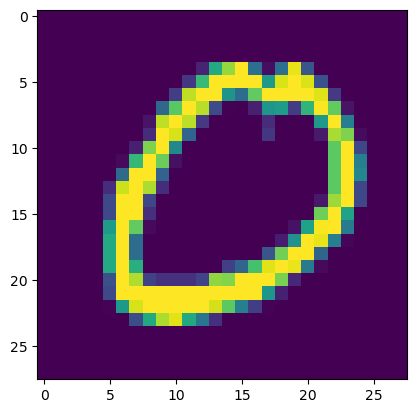

In [15]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [41]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
from sklearn.model_selection import train_test_split

In [42]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=100)

In [22]:
x_train.shape

(31500, 784)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

14.473468780517578


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9646666666666667

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
x_train = scaler.fit_transform(x_train)

In [56]:
x_test = scaler.transform(x_test)

In [46]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=150)

In [44]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [47]:
x_train_trf.shape

(31500, 150)

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(x_test_trf)

In [51]:
accuracy_score(y_pred,y_test)

0.9674285714285714

In [52]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(x_train_trf,y_train)
    
    y_pred = knn.predict(x_test_trf)
    
    print(accuracy_score(y_pred,y_test))

0.26771428571428574
0.414
0.4838095238095238
0.6178095238095238
0.7360952380952381
0.8247619047619048
0.8674285714285714
0.8945714285714286
0.9107619047619048
0.9197142857142857
0.9302857142857143
0.9393333333333334
0.9481904761904761
0.9540952380952381
0.9564761904761905
0.9613333333333334
0.9628571428571429
0.9638095238095238
0.964952380952381
0.966
0.9666666666666667
0.9681904761904762
0.9688571428571429
0.9702857142857143
0.9694285714285714
0.9692380952380952
0.9701904761904762
0.9709523809523809
0.9717142857142858
0.9719047619047619
0.9712380952380952
0.9705714285714285
0.9702857142857143
0.9712380952380952
0.9714285714285714
0.9720952380952381
0.971047619047619
0.9706666666666667
0.9706666666666667
0.9707619047619047
0.9708571428571429
0.9712380952380952
0.9713333333333334
0.9715238095238096
0.9711428571428572
0.9706666666666667
0.971047619047619
0.9706666666666667
0.9719047619047619
0.9728571428571429
0.9715238095238096
0.9723809523809523
0.9720952380952381
0.9721904761904762
0.

KeyboardInterrupt: 

In [59]:
#visualization for 2d

pca = PCA(n_components=2)

x_train_trf = scaler.fit_transform(x_train_trf)
x_test_trf = scaler.transform(x_test_trf)

x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [60]:
x_train_trf

array([[ 0.28111022, -0.47425473],
       [-7.7527393 , -2.51030166],
       [ 3.56415845, 14.57412346],
       ...,
       [-5.56685238, -0.23201933],
       [ 5.71814259, 10.76792946],
       [ 4.69600949, -8.36329836]])

In [64]:
y_train_trf = y_train.astype(str)

In [67]:
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [75]:
#visualization for 3d

pca = PCA(n_components=3)
x_train_trf3 = pca.fit_transform(x_train)
x_test_trf3 = pca.transform(x_test)

In [76]:
print(x_train_trf3)

[[ 0.28112192 -0.47423017 -0.23631361]
 [-7.75273298 -2.510488    3.0253928 ]
 [ 3.56412163 14.57407036 -1.37211348]
 ...
 [-5.56683386 -0.23230248 -6.93458469]
 [ 5.71814886 10.76745556 -6.68527129]
 [ 4.69596667 -8.36319692  2.71801704]]


In [79]:
fig = px.scatter_3d(x=x_train_trf3[:,0],
                    y=x_train_trf3[:,1],
                    z=x_train_trf3[:,2],
                    color=y_train_trf,
                    color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [80]:
pca.explained_variance_

array([40.50951573, 29.06822823, 26.88148868])

In [81]:
pca.components_

array([[-1.93690941e-18, -3.12097659e-20, -4.53365147e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.99895499e-17, -6.19881078e-18, -7.04458526e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.14342420e-17, -4.56112211e-18,  6.09164067e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [83]:
pca.explained_variance_ratio_*100

array([5.76219484, 4.13475184, 3.82370346])

In [85]:

pca = PCA(n_components=None)
x_train_trf3 = pca.fit_transform(x_train)
x_test_trf3 = pca.transform(x_test)

In [87]:
pca.explained_variance_.shape

(784,)

In [89]:
pca.components_.shape

(784, 784)

In [90]:
pca.explained_variance_ratio_

array([5.76219484e-02, 4.13475185e-02, 3.82370350e-02, 2.95884261e-02,
       2.58547629e-02, 2.25667788e-02, 1.96048462e-02, 1.78102169e-02,
       1.57909368e-02, 1.43776458e-02, 1.37991983e-02, 1.23695046e-02,
       1.13652471e-02, 1.11780260e-02, 1.05842091e-02, 1.02415746e-02,
       9.57811210e-03, 9.41391517e-03, 9.14138012e-03, 9.00534658e-03,
       8.50592409e-03, 8.16398875e-03, 7.74107976e-03, 7.54831954e-03,
       7.35565701e-03, 7.04668342e-03, 6.96175565e-03, 6.70862302e-03,
       6.32092638e-03, 6.26764996e-03, 6.20464855e-03, 6.04573766e-03,
       5.92277652e-03, 5.82633901e-03, 5.73726387e-03, 5.69875946e-03,
       5.50853415e-03, 5.48865671e-03, 5.31705473e-03, 5.19420118e-03,
       5.08986954e-03, 4.86850620e-03, 4.83762113e-03, 4.77798684e-03,
       4.66590884e-03, 4.57066585e-03, 4.55391754e-03, 4.47529094e-03,
       4.43405628e-03, 4.34274931e-03, 4.25440996e-03, 4.24919612e-03,
       4.11383656e-03, 4.06737860e-03, 4.02076167e-03, 3.96813332e-03,
      

In [91]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05762195, 0.09896947, 0.1372065 , 0.16679493, 0.19264969,
       0.21521647, 0.23482132, 0.25263153, 0.26842247, 0.28280012,
       0.29659931, 0.30896882, 0.32033407, 0.33151209, 0.3420963 ,
       0.35233788, 0.36191599, 0.3713299 , 0.38047128, 0.38947663,
       0.39798255, 0.40614654, 0.41388762, 0.42143594, 0.4287916 ,
       0.43583828, 0.44280004, 0.44950866, 0.45582959, 0.46209724,
       0.46830189, 0.47434762, 0.4802704 , 0.48609674, 0.491834  ,
       0.49753276, 0.5030413 , 0.50852995, 0.51384701, 0.51904121,
       0.52413108, 0.52899958, 0.53383721, 0.53861519, 0.5432811 ,
       0.54785177, 0.55240568, 0.55688098, 0.56131503, 0.56565778,
       0.56991219, 0.57416139, 0.57827522, 0.5823426 , 0.58636336,
       0.5903315 , 0.59420603, 0.59798933, 0.60171507, 0.60537626,
       0.6089858 , 0.61254056, 0.61605101, 0.61951036, 0.62294337,
       0.62633798, 0.6296926 , 0.63299371, 0.63621828, 0.63944125,
       0.642616  , 0.64577934, 0.64892864, 0.65205538, 0.65510

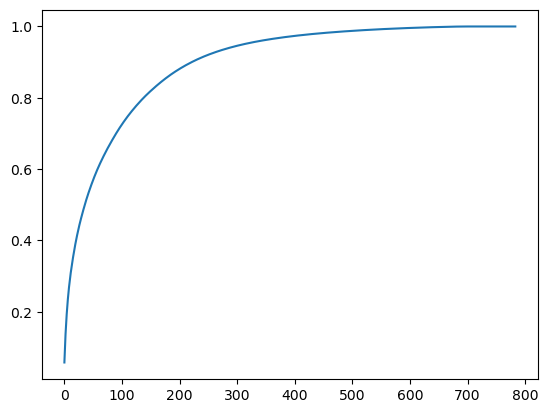

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))